<a href="https://colab.research.google.com/github/qaz027/Dojo_portfolio_project/blob/main/Project1_part4_francis_quimby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
    Histogram to view the distributions of various features in your dataset.
    Boxplot to view statistical summaries of various features in your dataset.
    Heatmap of the correlation between features.

'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

infile ='/content/drive/MyDrive/sales_predictions.csv'
sales_pred = pd.read_csv(infile)

print(sales_pred.head())

  Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]


In [ ]:
#clean and update values from last week
sales_pred.sort_values(by=['Item_Identifier','Item_Weight'], inplace=True)
sales_pred[['Item_Weight']] = sales_pred['Item_Weight'].fillna(method='pad') #backfill missing item weights
outlet_sz_miss = sales_pred["Outlet_Size"].isna()

sales_pred.sort_values(by=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'], inplace = True)
sales_pred[['Outlet_Size']]=sales_pred['Outlet_Size'].fillna(method='pad')
sales_pred.sort_index(inplace= True)
sales_pred.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Identifier"])["Outlet_Size"].value_counts(dropna=False)

Outlet_Type        Outlet_Location_Type  Outlet_Identifier  Outlet_Size
Grocery Store      Tier 1                OUT019             Small          528
                   Tier 3                OUT010             Small          555
Supermarket Type1  Tier 1                OUT046             Small          930
                                         OUT049             Medium         930
                   Tier 2                OUT017             Small          926
                                         OUT035             Small          930
                                         OUT045             Small          929
                   Tier 3                OUT013             High           932
Supermarket Type2  Tier 3                OUT018             Medium         928
Supermarket Type3  Tier 3                OUT027             Medium         935
Name: Outlet_Size, dtype: int64

In [ ]:
sales_pred['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
sales_pred['Item_Fat_Content'].replace({'LF':'Low Fat', 'lf':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)
sales_pred['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [44]:
#total sales per outlet and item
outlet_rev = sales_pred.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
outlet_rev.sort_values(ascending=True,inplace=True)
item_rev = sales_pred.groupby(['Item_Type'])['Item_MRP'].sum()
item_rev.sort_values(ascending=True,inplace=True)
outlets = outlet_rev.index
items = item_rev.index


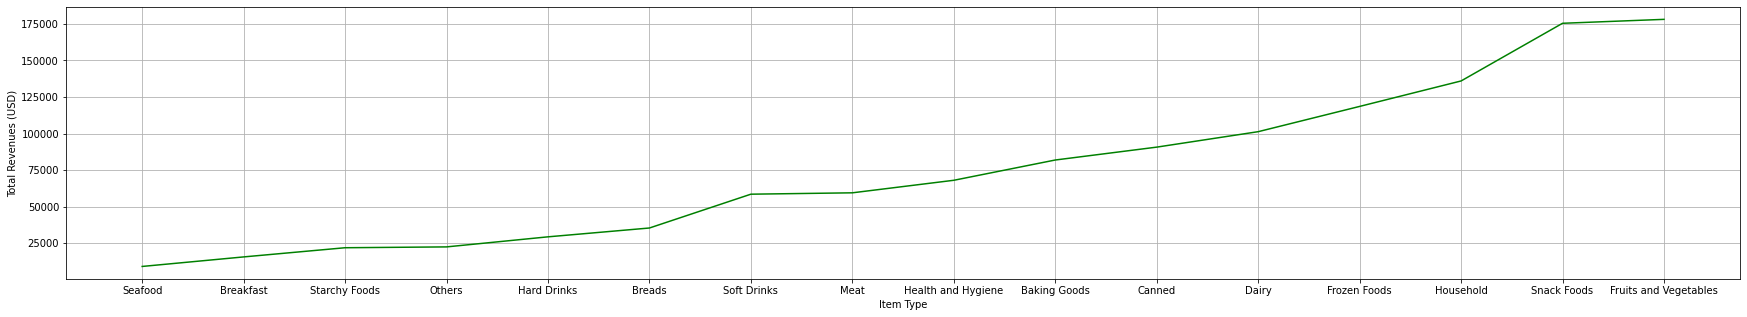

In [43]:
#plt.plot(items, item_rev, c='g', label = 'revenue');
#plt.plot(months, Y30_5_int, c= 'blue', label = '30Y 5% interest payments');
#plt.legend(loc=0);
fig = plt.figure(figsize=(30, 5))
ax = fig.add_subplot(111)
ax.plot(items, item_rev, c='g', label = 'revenue')
ax.grid();
#plt.tight_layout()

#plt.xticks(fontsize = 15) ;
#plt.yticks(fontsize = 15) ;
plt.xlabel('Item Type');
plt.ylabel('Total Revenues (USD)');

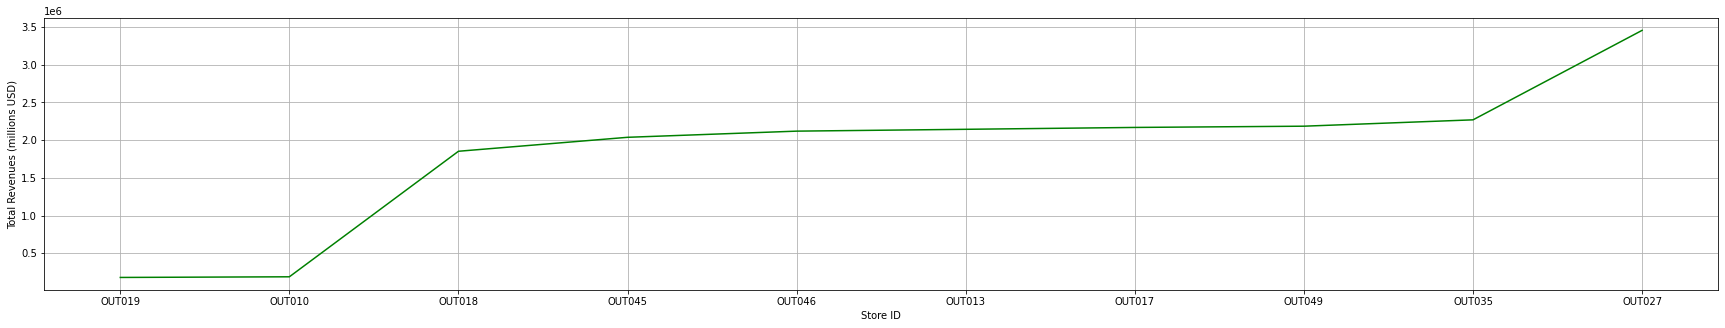

In [47]:
fig2 = plt.figure(figsize=(30, 5))
ax2 = fig2.add_subplot(111)
ax2.plot(outlets, outlet_rev, c='g', label = 'store revenue')
ax2.grid();
#plt.tight_layout()

#plt.xticks(fontsize = 15) ;
#plt.yticks(fontsize = 15) ;
plt.xlabel('Store ID');
plt.ylabel('Total Revenues (millions USD)');

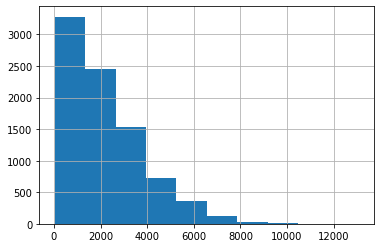

In [ ]:
sales_pred['Item_Outlet_Sales'].hist()

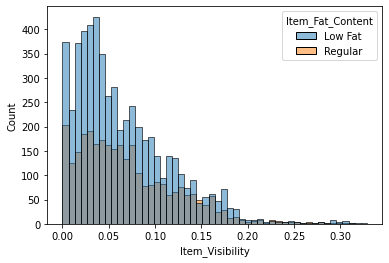

In [ ]:
sns.histplot(data=sales_pred, x='Item_Visibility', hue = 'Item_Fat_Content');

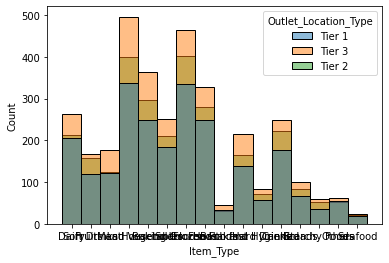

In [ ]:
sns.histplot(data=sales_pred, x='Item_Type', hue ='Outlet_Location_Type');

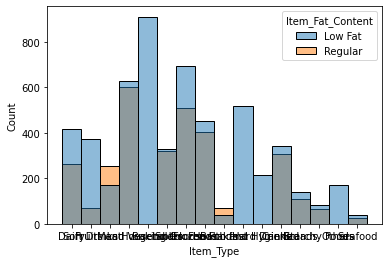

In [ ]:
sns.histplot(data=sales_pred, x='Item_Type', hue = 'Item_Fat_Content');